In [181]:
import pydotplus
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.externals.six import StringIO 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import seaborn as sns

In [59]:

#Carrega dataset com Pandas
df = pd.read_csv('../pulsar_stars.csv')
#df.drop([' Skewness of the DM-SNR curve'], axis=1, inplace=True)


#Esse dataset eh um classificador de Pulsar Stars. Onde 1 = pulsar star | 0 = not pulsar star

#Normaliza o dataset
normalizado = (df-df.min())/(df.max()-df.min())

#Numero de pulsar stars identificado como 1639
#print (sum(df['target_class']))

#Para balanceamento o dataset, pegamos 1639 not stars (undersampling)
not_stars = df[df['target_class'] == 0].sample(1639)

#Pega as pulsar stars
stars = df[df['target_class'] == 1]

#Concatena ambas formando um dataset balanceado
X = pd.concat([not_stars.drop(['target_class'], axis=1), stars.drop(['target_class'], axis=1)])
y = pd.concat([not_stars[['target_class']], stars[['target_class']]])

#Divide em train e validation com .8 train e .2 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

#Declara classificadores
decision_tree = tree.DecisionTreeClassifier(max_depth=None)
knn = KNeighborsClassifier(3)

#Treina knn
knn.fit(X_train, y_train.values.ravel())

#Treina decision_tree
decision_tree.fit(X_train, y_train.values.ravel())
'''
#Salva PDF da arvore gerada (requer pydotplus e graphviz)
dot_data = StringIO() 
tree.export_graphviz(decision_tree, 
                     out_file=dot_data,
                     feature_names=list(X_train),
                     class_names=['pulsar_star', 'not_star'],
                     filled=True, rounded=True,
                     impurity=False) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("tree.pdf") 
'''
#Predictions knn
predictions_knn = knn.predict(X_test)

#Predictions decision tree
predictions_tree = decision_tree.predict(X_test)

#Print das acuracias
print ("KNN Accuracy: ", accuracy_score(y_test, predictions_knn))
print ("Tree Accuracy: ", accuracy_score(y_test, predictions_tree))

KNN Accuracy:  0.9070121951219512
Tree Accuracy:  0.8963414634146342


---

In [8]:
df = pd.read_csv('../pulsar_stars.csv')

In [33]:
df.sample(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
13704,132.320312,61.994195,-0.371815,-0.687203,0.877090,10.380267,18.739863,396.416440,0
6078,136.804688,52.822974,-0.026834,-0.344429,2.031773,13.862644,11.632196,173.116824,0
17064,99.429688,42.059237,0.215801,0.892928,1.391304,13.426527,12.369955,176.135598,0
17521,124.726562,45.963422,0.222635,-0.151495,0.898829,9.570490,18.658719,438.205929,0
1174,111.429688,48.270346,0.247512,0.256304,5.392140,27.650245,6.180369,40.693631,0


In [35]:
list(df)

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve',
 'target_class']

In [34]:
df["target_class"].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

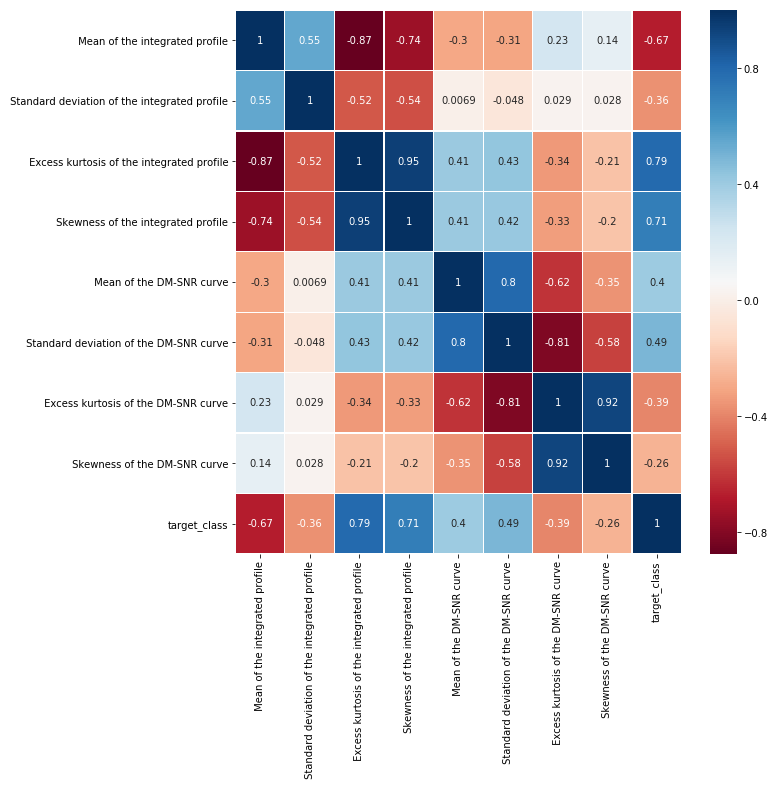

In [20]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), linecolor="white", annot=True, linewidths=0.1, cmap="RdBu")


---

In [176]:
from sklearn import datasets
import numpy as np

digits = datasets.load_digits()
X, y = digits.data, digits.target

acc_knn  = []
acc_tree = []
counter  = []

for i in np.arange(1,100,2):
    test_size = i/100
    counter.append(test_size)
    #print(test_size)
    
    #Divide em train e validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    #Declara classificadores
    decision_tree = tree.DecisionTreeClassifier()
    knn = KNeighborsClassifier(3)

    #Treina knn
    knn.fit(X_train, y_train)

    #Treina decision_tree
    decision_tree.fit(X_train, y_train)
    '''
    #Salva PDF da arvore gerada (requer pydotplus e graphviz)
    dot_data = StringIO() 
    tree.export_graphviz(decision_tree, 
                         out_file=dot_data,
                         feature_names=list(X_train),
                         class_names=['pulsar_star', 'not_star'],
                         filled=True, rounded=True,
                         impurity=False) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    graph.write_pdf("tree.pdf") 
    '''
    #Predictions knn
    predictions_knn = knn.predict(X_test)

    #Predictions decision tree
    predictions_tree = decision_tree.predict(X_test)


    acc_knn.append(accuracy_score(y_test, predictions_knn))
    acc_tree.append(accuracy_score(y_test, predictions_tree))

    #Print das acuracias
    #print ("KNN Accuracy: %.2f " % accuracy_score(y_test, predictions_knn))
    #print ("Tree Accuracy: %.2f "% accuracy_score(y_test, predictions_tree))

Text(0,0.5,'acurácia')

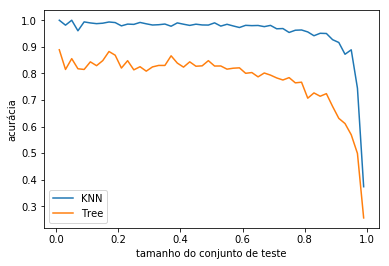

In [153]:
fig, ax = plt.subplots()

plot_knn,  = ax.plot(counter, acc_knn, label='KNN')
plot_tree, = ax.plot(counter, acc_tree, label='Tree')

ax.legend()
plt.xlabel("tamanho do conjunto de teste")
plt.ylabel("acurácia")

#plt.savefig('acuracia x test_size.png', dpi=500)

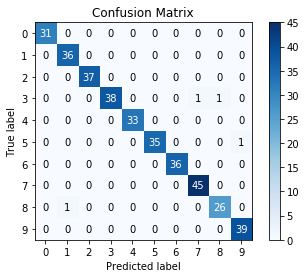

In [177]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_knn)
plt.savefig('confusion_matrix_knn', dpi=500)

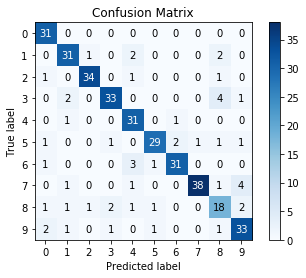

In [180]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_tree)
plt.savefig('confusion_matrix_tree', dpi=500)

In [ ]:
sns.pairplot(dataset, hue='target')

In [ ]:
sns.pairplot(dataset, hue='target')

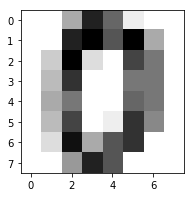

In [96]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
plt.show()

---

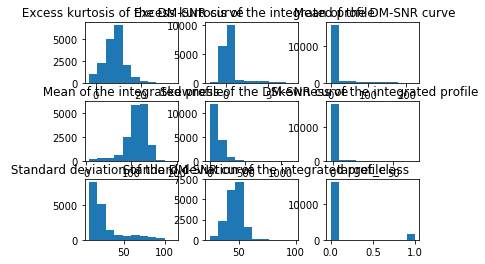

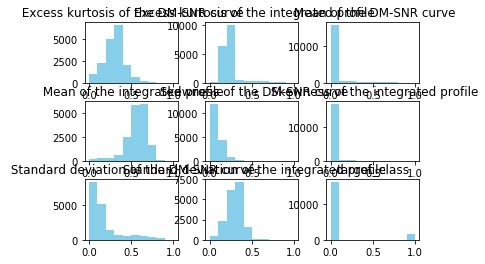

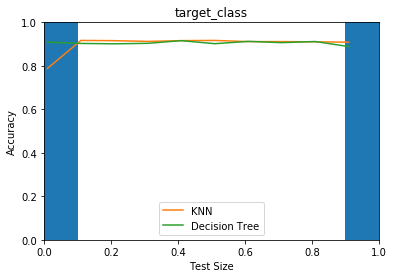

In [145]:
import pydotplus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.externals.six import StringIO 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Carrega dataset com Pandas
df = pd.read_csv('../pulsar_stars.csv')

#Esse dataset eh um classificador de Pulsar Stars. Onde 1 = pulsar star | 0 = not pulsar star

#Numero de pulsar stars identificado como 1639
#print (sum(df['target_class']))

#Gera um histograma do dataset bruto
df.hist(grid=False)

#Normaliza o dataset
normalizado = (df-df.min())/(df.max()-df.min())

#Gera um histograma do dataset normalizado
normalizado.hist(grid=False, color='skyblue')

#Para balanceamento o dataset, pegamos 1639 not stars (undersampling)
not_stars = df[df['target_class'] == 0].sample(1639)

#Pega as pulsar stars
stars = df[df['target_class'] == 1].sample(1639)

# #Concatena ambas formando um dataset balanceado
X = pd.concat([not_stars.drop(['target_class'], axis=1), stars.drop(['target_class'], axis=1)])
y = pd.concat([not_stars[['target_class']], stars[['target_class']]])

y.hist(grid=False)

#Declara classificadores
decision_tree = tree.DecisionTreeClassifier()
knn = KNeighborsClassifier(3)

#Declara listas
knn_preds = []
tree_preds = []
test_size = []

for i in np.arange(0.01, 0.99, 0.1):

    #Divide em train e validation com .8 train e .2 test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    
    #Treina knn
    knn.fit(X_train.values, y_train.values.ravel())

    #Treina decision_tree
    decision_tree.fit(X_train.values, y_train.values.ravel())

    #Salva PDF da arvore gerada (requer pydotplus e graphviz)
    # dot_data = StringIO() 
    # tree.export_graphviz(decision_tree, 
    #                      out_file=dot_data,
    #                      feature_names=list(X_train),
    #                      class_names=['pulsar_star', 'not_star'],
    #                      filled=True, rounded=True,
    #                      impurity=False) 
    # graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    # graph.write_pdf("tree.pdf") 

    #Predictions knn
    predictions_knn = knn.predict(X_test.values)

    #Predictions decision tree
    predictions_tree = decision_tree.predict(X_test.values)

    #Append das acuracias
    knn_preds.append(accuracy_score(y_test.values, predictions_knn))
    tree_preds.append(accuracy_score(y_test.values, predictions_tree))
    test_size.append(i)

plt.plot(test_size, knn_preds)
plt.plot(test_size, tree_preds)
plt.ylabel("Accuracy")
plt.xlabel("Test Size")
plt.legend(["KNN", "Decision Tree"])
plt.axis([0, 1, 0, 1])
plt.show()